In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("C:\\Users\\ritwi\\OneDrive\\Desktop\\mpce-ml\\data\\ds-mospi.xlsx")
print(df.head())

   Sector  State  NSS-Region  District  Household Type  Religion_HH_head  \
0       1      1          13        11               6                 2   
1       1      1          13        11               2                 2   
2       1      1          13        11               2                 2   
3       1      1          13        11               6                 2   
4       1      1          13        11               1                 2   

   Social_Group_HH_head  HH Size (For FDQ)  NCO-2015 Code(3-digit)  \
0                     9                  6                   931.0   
1                     9                  4                   833.0   
2                     9                  5                   931.0   
3                     9                  4                   931.0   
4                     9                  4                   931.0   

   NIC-2008 Code(5-digit)  ...  Is_HH_Have_Trucks  Is_HH_Have_Animal_cart  \
0                 42909.0  ...               

In [2]:
df['NIC-2008 Code(5-digit)'].fillna(df['NIC-2008 Code(5-digit)'].mode()[0], inplace=True)
df['NCO-2015 Code(3-digit)'].fillna(df['NCO-2015 Code(3-digit)'].mode()[0], inplace=True)
print(df['NCO-2015 Code(3-digit)'])
print(df['NIC-2008 Code(5-digit)'])

0        931.0
1        833.0
2        931.0
3        931.0
4        931.0
         ...  
52345    522.0
52346    112.0
52347    513.0
52348    753.0
52349    753.0
Name: NCO-2015 Code(3-digit), Length: 52350, dtype: float64
0        42909.0
1        49211.0
2        41001.0
3        41001.0
4        41001.0
          ...   
52345    47219.0
52346    47820.0
52347    56101.0
52348    14105.0
52349    14105.0
Name: NIC-2008 Code(5-digit), Length: 52350, dtype: float64


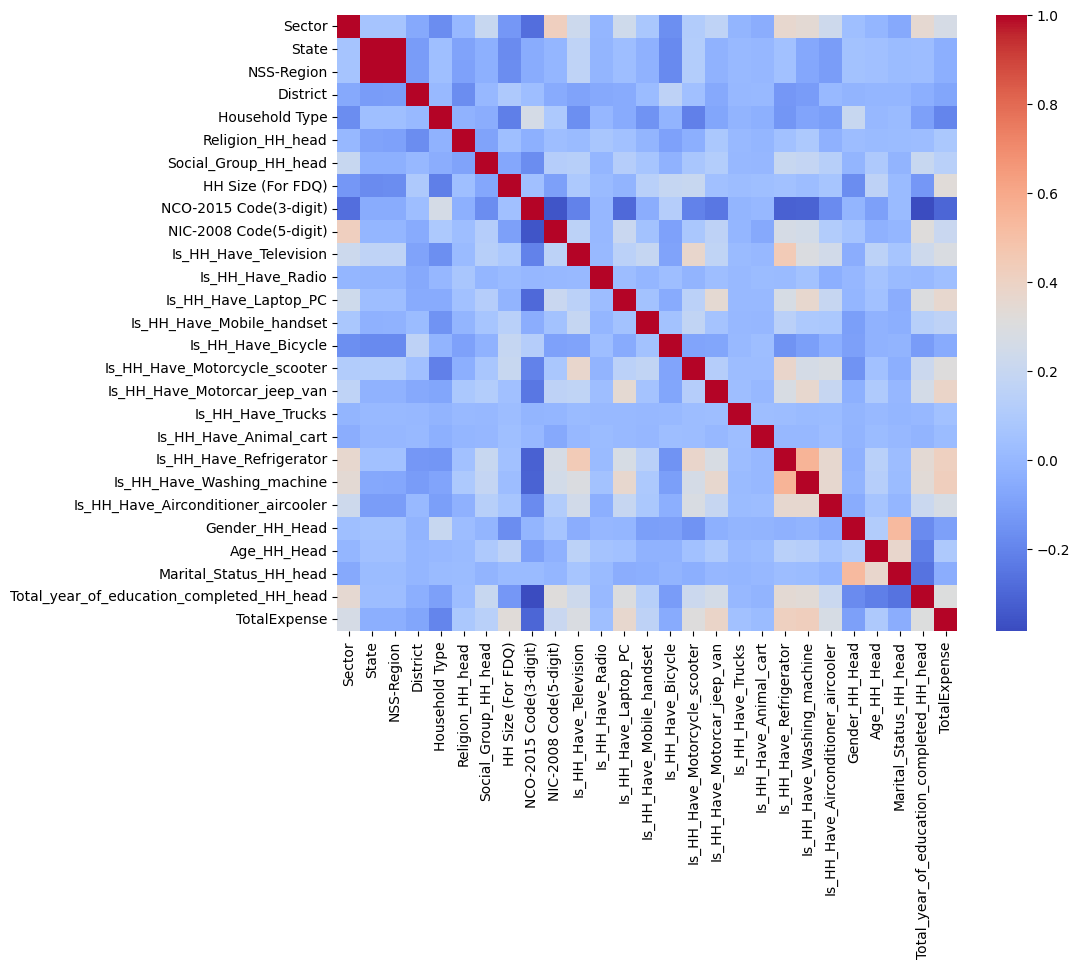

In [3]:
#due to large dataset- i find correlation in features using a heatmap
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = "coolwarm")
plt.show()

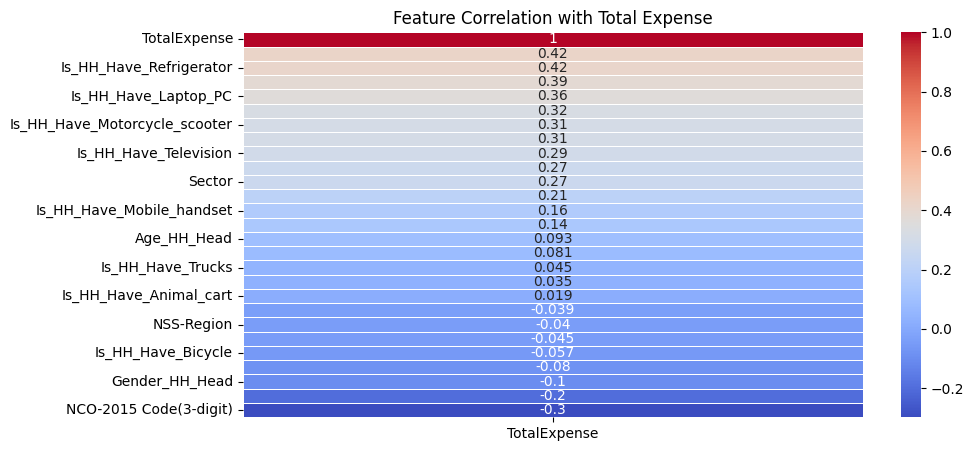

In [4]:
#for more clearer relationship with target variable "Total Expnditure", i construct another heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix[['TotalExpense']].sort_values(by='TotalExpense', ascending=False), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Total Expense")
plt.show()

from above heatmap, it becomes clear what features are important. it is a good measure to set a threshold. |corr|>0.2 is the initial threshold

In [5]:
threshold = 0.2
target_corr = correlation_matrix["TotalExpense"].abs()
print(target_corr)
select_features = target_corr[target_corr>=threshold].index
df_f = df[select_features]
print("Kept columns:", list(df_f.columns))

Sector                                       0.269410
State                                        0.038709
NSS-Region                                   0.040392
District                                     0.080216
Household Type                               0.197655
Religion_HH_head                             0.081084
Social_Group_HH_head                         0.139465
HH Size (For FDQ)                            0.324137
NCO-2015 Code(3-digit)                       0.298000
NIC-2008 Code(5-digit)                       0.208787
Is_HH_Have_Television                        0.290678
Is_HH_Have_Radio                             0.034970
Is_HH_Have_Laptop_PC                         0.364419
Is_HH_Have_Mobile_handset                    0.159947
Is_HH_Have_Bicycle                           0.056785
Is_HH_Have_Motorcycle_scooter                0.309220
Is_HH_Have_Motorcar_jeep_van                 0.385354
Is_HH_Have_Trucks                            0.045276
Is_HH_Have_Animal_cart      

In [25]:
#i will work with filtered df
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#remove target variable for featurs
X = df.drop(columns = ['TotalExpense'])
print(df.columns)
scaler = StandardScaler()
num_cols = ['Total_year_of_education_completed_HH_head', 'HH Size (For FDQ)']
X[num_cols] = scaler.fit_transform(X[num_cols])
y = df['TotalExpense'] #target variable

#70-30 train temp split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#split temp set into 15-15 test-validate
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Index(['Sector', 'State', 'NSS-Region', 'District', 'Household Type',
       'Religion_HH_head', 'Social_Group_HH_head', 'HH Size (For FDQ)',
       'NCO-2015 Code(3-digit)', 'NIC-2008 Code(5-digit)',
       'Is_HH_Have_Television', 'Is_HH_Have_Radio', 'Is_HH_Have_Laptop_PC',
       'Is_HH_Have_Mobile_handset', 'Is_HH_Have_Bicycle',
       'Is_HH_Have_Motorcycle_scooter', 'Is_HH_Have_Motorcar_jeep_van',
       'Is_HH_Have_Trucks', 'Is_HH_Have_Animal_cart',
       'Is_HH_Have_Refrigerator', 'Is_HH_Have_Washing_machine',
       'Is_HH_Have_Airconditioner_aircooler', 'Gender_HH_Head', 'Age_HH_Head',
       'Marital_Status_HH_head', 'Total_year_of_education_completed_HH_head',
       'TotalExpense'],
      dtype='object')
Training set: (36645, 26), (36645,)
Validation set: (26175, 26), (26175,)
Test set: (26175, 26), (26175,)


In [ ]:
#fundamental linear regression will not help due to absence of linearity in data structure. but i am implementing it as a warm up
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
#lr model evaluation params
y_val_pred = lr_model.predict(X_val)
mae_score = mean_absolute_error(y_val, y_val_pred)
mse_score = mean_squared_error(y_val, y_val_pred)
rmse_score = mse_score**0.5

r2 =  r2_score(y_val, y_val_pred)

print("model evaluations: " , mae_score,rmse_score, r2)
#for further verification that regression will fail at this, we can implement ridge/lasso regression too

#ridge regression
ridge_model = Ridge(alpha=0.7)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_val)
mae_ridge = mean_absolute_error(y_val, y_val_pred)
mse_ridge = mean_squared_error(y_val, y_val_pred)
rmse_ridge = mse_ridge**0.5
r2_ridge =  r2_score(y_val, y_val_pred)
print("model evaluations: " , mae_ridge,rmse_ridge, r2_ridge)

#lasso regression
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_lasso_pred)
rmse_lasso = mean_squared_error(y_test, y_lasso_pred) ** 0.5
r2_lasso = r2_score(y_test, y_lasso_pred)
print("model evaluations: " , mae_lasso,rmse_lasso, r2_lasso)
#conclusion: L1 regularization works slightly better than L2 


model evaluations:  6033.945804197584 10554.68930695207 0.4181530785801034
model evaluations:  6033.945804197584 10554.68930695207 0.4181530785801034
model evaluations:  6129.10318751954 9752.496188499803 0.46565788652984874


c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.956e+12, tolerance: 6.924e+08
  model = cd_fast.enet_coordinate_descent(


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2)
rf_model.fit(X_train, y_train)

# Predict on test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_rf_pred)
rmse_rf = mean_squared_error(y_test, y_rf_pred) ** 0.5
r2_rf = r2_score(y_test, y_rf_pred)

# Display results
rf_results = {
    "Model": "Random Forest",
    "MAE": mae_rf,
    "RMSE": rmse_rf,
    "R² Score": r2_rf,
}

rf_results


{'Model': 'Random Forest',
 'MAE': 4446.633383023187,
 'RMSE': 7779.360558870277,
 'R² Score': 0.6600025758767295}

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_grid, 
                               n_iter=10, cv=5, 
                               verbose=2, n_jobs=-1, 
                               random_state=42)

rf_random.fit(X_train, y_train)
print("Best Hyperparameters:", rf_random.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\ritwi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


In [10]:
# Get the best parameters
best_params = rf_random.best_params_

# Train optimized Random Forest model
rf_optimized = RandomForestRegressor(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)

# Predict and evaluate
y_rf_opt_pred = rf_optimized.predict(X_test)
mae_rf_opt = mean_absolute_error(y_test, y_rf_opt_pred)
rmse_rf_opt = mean_squared_error(y_test, y_rf_opt_pred) ** 0.5
r2_rf_opt = r2_score(y_test, y_rf_opt_pred)

print(f"Optimized Random Forest MAE: {mae_rf_opt:.2f}")
print(f"Optimized Random Forest RMSE: {rmse_rf_opt:.2f}")
print(f"Optimized Random Forest R² Score: {r2_rf_opt:.4f}")


Optimized Random Forest MAE: 4846.56
Optimized Random Forest RMSE: 8134.94
Optimized Random Forest R² Score: 0.6282


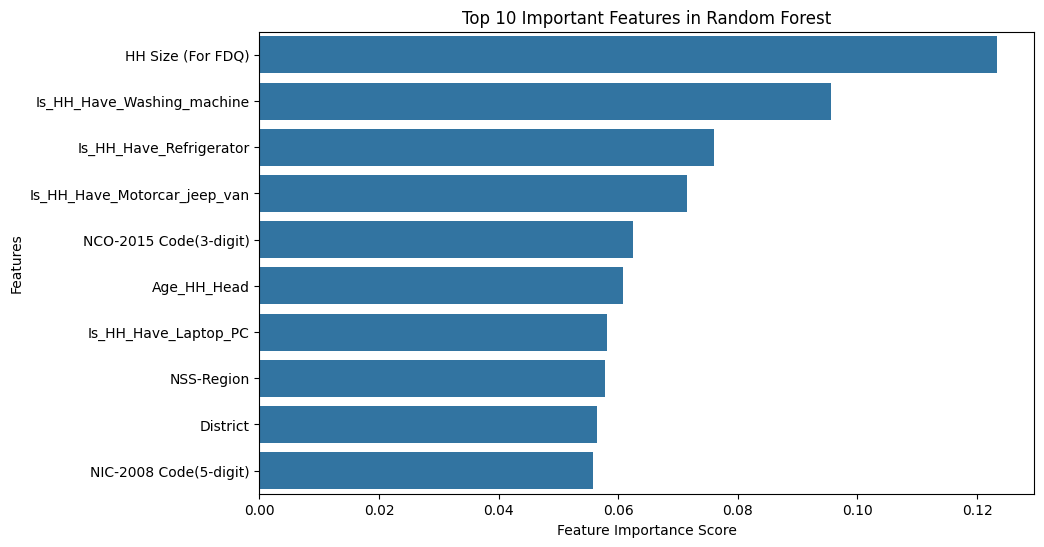

       HH Size (For FDQ)  Is_HH_Have_Washing_machine  Is_HH_Have_Refrigerator  \
11128          -1.092491                           0                        0   
39877          -0.138378                           0                        1   
2676            0.338678                           0                        1   
52032          -0.615434                           1                        1   
45938          -0.138378                           0                        1   
...                  ...                         ...                      ...   
11284           0.815734                           0                        0   
44732          -1.092491                           0                        0   
38158          -0.615434                           0                        0   
860            -0.138378                           0                        0   
15795          -0.615434                           0                        1   

       Is_HH_Have_Motorcar_

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.Series(rf_optimized.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()

# Select only top important features (e.g., top 10)
important_features = feature_importance.head(10).index
X_train_selected = X_train[important_features]
print(X_train_selected)
X_test_selected = X_test[important_features]
print(X_test_selected)

# Retrain Random Forest using selected features
rf_selected = RandomForestRegressor(**best_params, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate again
y_rf_sel_pred = rf_selected.predict(X_test_selected)
mae_rf_sel = mean_absolute_error(y_test, y_rf_sel_pred)
rmse_rf_sel = mean_squared_error(y_test, y_rf_sel_pred) ** 0.5
r2_rf_sel = r2_score(y_test, y_rf_sel_pred)

print(f"Random Forest (Selected Features) MAE: {mae_rf_sel:.2f}")
print(f"Random Forest (Selected Features) RMSE: {rmse_rf_sel:.2f}")
print(f"Random Forest (Selected Features) R² Score: {r2_rf_sel:.4f}")


selected features random forest is giving the least R^2 while rf fit with original df is at 0.66 R^2

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_reg.fit(X_train, y_train)
print(X_train)
y_pred = xgb_reg.predict(X_test)
print(y_pred)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)


print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.4f}")


       Sector  State  NSS-Region  District  Household Type  Religion_HH_head  \
11128       1      9          95        16               1                 1   
39877       1     36         362        11               1                 1   
2676        1     29         294         5               1                 1   
52032       2     33         331         1               2                 1   
45938       2     19         191         2               1                 1   
...       ...    ...         ...       ...             ...               ...   
11284       1     10         101         9               5                 2   
44732       1     30         301         1               6                 1   
38158       1     18         184        27               1                 3   
860         1     10         101        17               5                 1   
15795       1      2          21         2               6                 1   

       Social_Group_HH_head  HH Size (F

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)


xgb_random = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_grid, 
    n_iter=10, 
    cv=5, 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

xgb_random.fit(X_train, y_train)


best_params = xgb_random.best_params_
print("Best Hyperparameters:", best_params)

best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
train_r2 = best_xgb.score(X_train, y_train)
test_r2 = best_xgb.score(X_test, y_test)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Overfitting ")
elif train_r2 < test_r2:
    print("Underfitting")
else:
    print("well-balanced.")


Training R² Score: 0.5676
Test R² Score: 0.5651
well-balanced.


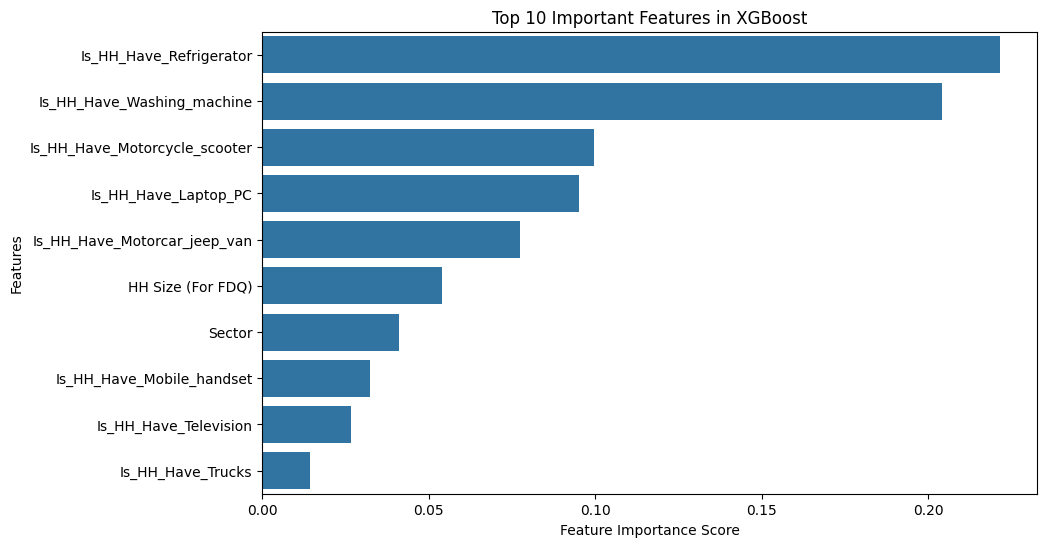

In [15]:


feature_importance = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in XGBoost")
plt.show()


In [16]:

top_features = feature_importance.head(20).index


X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

best_xgb.fit(X_train_selected, y_train)

y_pred_selected = best_xgb.predict(X_test_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"R² Score After Feature Selection: {r2_selected:.4f}")


R² Score After Feature Selection: 0.5594


In [17]:
#i kept some very important features and some from botttom balancing it out. if i was reducing based on absolute importance
#the results were not good.
important_features = feature_importance.head(15).index
additional_features = feature_importance.tail(5).index 
final_features = list(important_features) + list(additional_features)


X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

best_xgb.fit(X_train_final, y_train)
y_pred_final = best_xgb.predict(X_test_final)


r2_final = r2_score(y_test, y_pred_final)
print(f"XGBoost R² Score After Reintroducing Some Features: {r2_final:.4f}")


XGBoost R² Score After Reintroducing Some Features: 0.5409


In [18]:
best_xgb = XGBRegressor(
    n_estimators=600,  
    learning_rate=0.03,  
    max_depth=8, 
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_pred_new = best_xgb.predict(X_test)
r2_new = r2_score(y_test, y_pred_new)

print(f"XGBoost R² Score After More Trees & Depth: {r2_new:.4f}")


XGBoost R² Score After More Trees & Depth: 0.6573


In [19]:
best_xgb = XGBRegressor(
    n_estimators=500,  
    learning_rate=0.05,  
    max_depth=5,  
    min_child_weight=5,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_alpha=0.5,  
    reg_lambda=5.0,  
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_pred_reg = best_xgb.predict(X_test)
r2_reg = r2_score(y_test, y_pred_reg)

print(f" Regularization Applied: New Test R² = {r2_reg:.4f}")
train_r2 = best_xgb.score(X_train, y_train)
test_r2 = best_xgb.score(X_test, y_test)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Overfitting ")
elif train_r2 < test_r2:
    print("Underfitting")
else:
    print("well-balanced.")

 Regularization Applied: New Test R² = 0.5817
Training R² Score: 0.5965
Test R² Score: 0.5817
well-balanced.


In [20]:
best_xgb = XGBRegressor(
    n_estimators=500,  
    learning_rate=0.09,  
    max_depth=6,  
    min_child_weight=20, 
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_alpha=5.0, 
    reg_lambda=25.0, 
    random_state=42
)
best_xgb.fit(X_train, y_train)

y_pred_new = best_xgb.predict(X_test)
r2_new = r2_score(y_test, y_pred_new)

print(f"New Test R² = {r2_new:.4f}")


New Test R² = 0.6032


In [21]:
train_r2 = best_xgb.score(X_train, y_train)
test_r2 = best_xgb.score(X_test, y_test)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

if train_r2 - test_r2 > 0.1:
    print("Overfitting ")
elif train_r2 < test_r2:
    print("Underfitting")
else:
    print("well-balanced.")

Training R² Score: 0.6541
Test R² Score: 0.6032
well-balanced.


In [22]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=kf, scoring="r2")

print(f"📊 K-Fold Cross-Validation R² Scores: {cv_scores}")
print(f"📉 Average K-Fold R² Score: {cv_scores.mean():.4f}")


📊 K-Fold Cross-Validation R² Scores: [0.35097771 0.5255085  0.54067601 0.55565981 0.54704114]
📉 Average K-Fold R² Score: 0.5040


In [23]:
import numpy as np

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(f"CV Mean: {cv_mean:.4f}, Standard Deviation: {cv_std:.4f}")


CV Mean: 0.5040, Standard Deviation: 0.0771


In [24]:
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: R² Score = {score:.4f}")


Fold 1: R² Score = 0.3510
Fold 2: R² Score = 0.5255
Fold 3: R² Score = 0.5407
Fold 4: R² Score = 0.5557
Fold 5: R² Score = 0.5470
